## Pandas

In [1]:
a = [1,2,3]
type(a)

list

In [2]:
import numpy 
na = numpy.array(a)
na

array([1, 2, 3])

In [3]:
type(na)

numpy.ndarray

In [4]:
na + 3

array([4, 5, 6])

In [5]:
na ** 2

array([1, 4, 9])

In [6]:
import pandas
pa = pandas.Series(a)

In [7]:
pa

0    1
1    2
2    3
dtype: int64

In [8]:
customers = [
 {'name': 'John', 'gender': 'M', 'age':32},
 {'name': 'Mary', 'gender': 'F', 'age':18}
]

In [10]:
import pandas
df = pandas.DataFrame(customers)
df

,age,gender,name
0,32,M,John
1,18,F,Mary


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
age       2 non-null int64
gender    2 non-null object
name      2 non-null object
dtypes: int64(1), object(2)
memory usage: 128.0+ bytes


In [12]:
df.describe()

,age
count,2.000000
mean,25.000000
std,9.899495
min,18.000000
25%,21.500000
50%,25.000000
75%,28.500000
max,32.000000


In [13]:
df.head(1)

,age,gender,name
0,32,M,John


In [14]:
df[df['gender'] == 'M']

,age,gender,name
0,32,M,John


## Pandas 進階分析

In [15]:
import pandas as pd
namesall = []
for year in range(1880, 2011):
    path = 'names/yob' + str(year) + '.txt'
    df = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    df['year'] = year
    namesall.append(df)


In [16]:
len(namesall)

131

In [18]:
type(namesall[0])

pandas.core.frame.DataFrame

In [19]:
df_names =  pd.concat(namesall, ignore_index=True)


In [21]:
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [24]:
#df_names['sex'] == 'M'

In [25]:
df_last_letter = df_names[df_names['sex'] == 'M']

In [30]:
n = 'John'
n[-1]

'n'

In [32]:
df_last_letter['last_letter'] = df_last_letter['name'].str[-1]

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_last_letter.head(10)

,name,sex,births,year,last_letter
942,John,M,9655,1880,n
943,William,M,9533,1880,m
944,James,M,5927,1880,s
945,Charles,M,5348,1880,s
946,George,M,5126,1880,e
947,Frank,M,3242,1880,k
948,Joseph,M,2632,1880,h
949,Thomas,M,2534,1880,s
950,Henry,M,2444,1880,y
951,Robert,M,2416,1880,t


In [52]:
table = df_last_letter.pivot_table('births', index = 'last_letter',columns = ['year'], aggfunc=sum)

In [36]:
#table

In [37]:
subtable = table[[1906, 1956, 2006]]

In [39]:
?subtable.head()

In [38]:
subtable.head()

year,1906,1956,2006
last_letter,,,
a,654.0,4936.0,36156.0
b,276.0,1980.0,42600.0
c,315.0,9848.0,26635.0
d,14892.0,285524.0,51410.0
e,19721.0,175848.0,142999.0


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


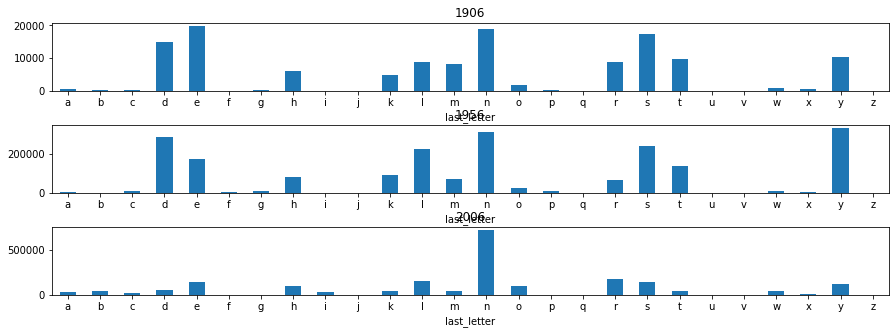

In [41]:
%pylab inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

subtable[1906].plot(kind='bar', rot=0, ax=axes[0], title='1906')
subtable[1956].plot(kind='bar', rot=0, ax=axes[1], title='1956')
subtable[2006].plot(kind='bar', rot=0, ax=axes[2], title='2006')

plt.show()


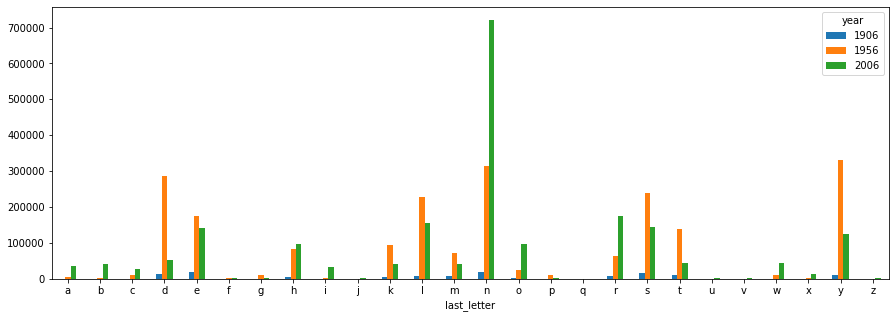

In [42]:
subtable.plot(kind='bar', rot=0, figsize=(15, 5))


In [45]:
subtable.sum(axis=0)

year
1906     133159.0
1956    2113067.0
2006    2050234.0
dtype: float64

In [46]:
subtable.sum(axis=1)

last_letter
a      41746.0
b      44856.0
c      36798.0
d     351826.0
e     338568.0
f       4879.0
g      14059.0
h     188857.0
i      34824.0
j       1241.0
k     141384.0
l     392811.0
m     121569.0
n    1054687.0
o     122331.0
p      15185.0
q        430.0
r     249869.0
s     400640.0
t     191114.0
u       2305.0
v       2077.0
w      56122.0
x      18212.0
y     466588.0
z       3482.0
dtype: float64

In [47]:
ratio_subtable = subtable / subtable.sum(axis=0)


In [48]:
ratio_subtable

year,1906,1956,2006
last_letter,,,
a,0.004911,0.002336,0.017635
b,0.002073,0.000937,0.020778
c,0.002366,0.004661,0.012991
d,0.111836,0.135123,0.025075
e,0.148101,0.083219,0.069748
f,0.001044,0.001312,0.000960
g,0.001998,0.005615,0.000941
h,0.045239,0.039921,0.048032
i,0.000804,0.000548,0.016368


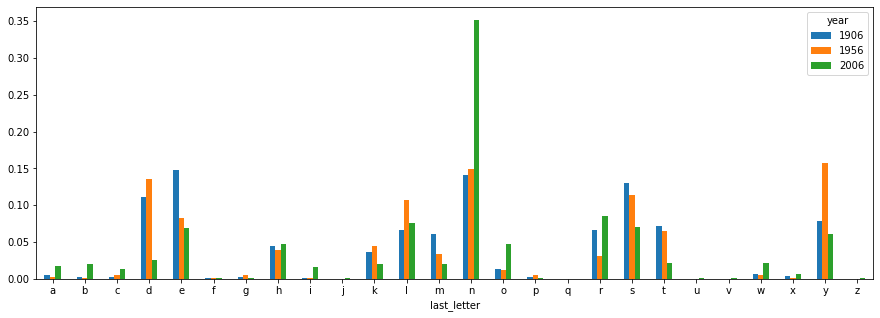

In [49]:
ratio_subtable.plot(kind='bar', rot=0, figsize=(15, 5))


In [53]:
ratio_table = table / table.sum(axis=0)


In [54]:
ratio_table


year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
last_letter,,,,,,,,,,,,,,,,,,,,,
a,0.007023,0.007613,0.006799,0.007235,0.007139,0.006614,0.006996,0.006903,0.006777,0.006366,...,0.020162,0.020019,0.019177,0.019505,0.018481,0.017635,0.016747,0.016189,0.015927,0.014980
b,0.004607,0.004665,0.004451,0.004320,0.004334,0.004091,0.004080,0.004280,0.003872,0.003517,...,0.026256,0.025418,0.024368,0.023171,0.021645,0.020778,0.020357,0.019655,0.019693,0.020470
c,0.003159,0.003285,0.003070,0.002858,0.002787,0.002792,0.002554,0.002574,0.002524,0.002450,...,0.013972,0.014048,0.014042,0.013514,0.013083,0.012991,0.012983,0.012458,0.012186,0.012181
d,0.083055,0.083247,0.085340,0.084066,0.086120,0.085472,0.087647,0.089072,0.087707,0.091934,...,0.031352,0.028794,0.027069,0.026118,0.025420,0.025075,0.024451,0.023574,0.023398,0.023387
e,0.122116,0.123139,0.128537,0.126070,0.127895,0.130313,0.130658,0.130280,0.130270,0.130111,...,0.074927,0.074603,0.073396,0.071710,0.070799,0.069748,0.069445,0.069362,0.068663,0.067959
f,0.000977,0.000824,0.001187,0.001013,0.001145,0.001067,0.001011,0.001223,0.001158,0.001121,...,0.000906,0.000937,0.000922,0.000961,0.000996,0.000960,0.001010,0.001080,0.001121,0.001188
g,0.001330,0.001449,0.001284,0.001290,0.001398,0.001688,0.001273,0.001154,0.001572,0.001121,...,0.001108,0.001075,0.001019,0.000927,0.000944,0.000941,0.000986,0.001013,0.001214,0.001404
h,0.036645,0.037380,0.036732,0.037512,0.037066,0.037615,0.036891,0.038960,0.038376,0.038530,...,0.044297,0.045429,0.044729,0.045227,0.046404,0.048032,0.048044,0.049328,0.050664,0.051670
i,0.001810,0.002045,0.001821,0.001596,0.001381,0.001364,0.001544,0.001371,0.001498,0.001393,...,0.010812,0.012177,0.013187,0.014383,0.015711,0.016368,0.017026,0.018772,0.020732,0.022628


In [56]:
dny = ratio_table.loc[['d', 'n', 'y']]


In [59]:
#dny.plot(kind='line', rot=0)


In [62]:
dny.T.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


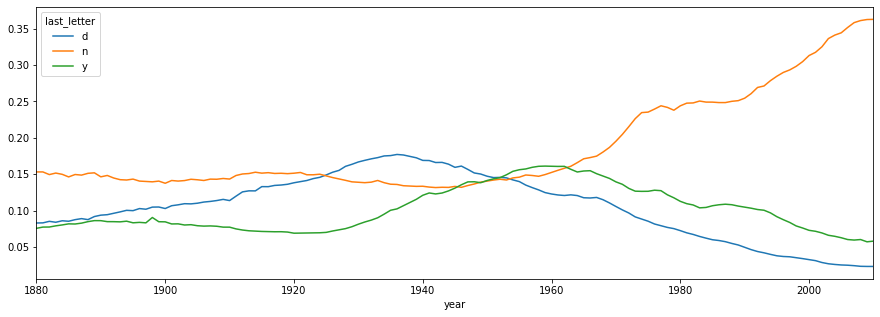

In [63]:
dny.T.plot(rot=0, figsize=(15, 5))


In [66]:
df_names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [68]:
#df_names['name'].isin(['David', 'John'])

## 小測驗

- 請使用pandas 的聚合(Aggregation)功能，統計菜市場名排行前十名男性的名字
- 請將前十菜市場男性名從1880年到2010 年的出生數量變化，用折線圖繪出 (x = 年, y= 出生數, 線: 前十菜市場名)


In [74]:
# SELECT name, SUM(births) FROM df_names 
# WHERE sex = 'M' GROUP BY name 
# ORDER BY SUM(births) DESC LIMIT 10
#df_names['sex'] == 'M'
top_10_names = df_names[df_names['sex'] == 'M'].groupby('name')['births'].sum().sort_values(ascending = False).head(10)

In [76]:
top_10_names.index

Index(['James', 'John', 'Robert', 'Michael', 'William', 'David', 'Richard',
       'Joseph', 'Charles', 'Thomas'],
      dtype='object', name='name')

In [80]:
table = df_names[(df_names['name'].isin(top_10_names.index)) & 
         (df_names['sex']=='M')]

In [83]:
df = table.pivot_table('births', index='year', columns='name', aggfunc=sum)

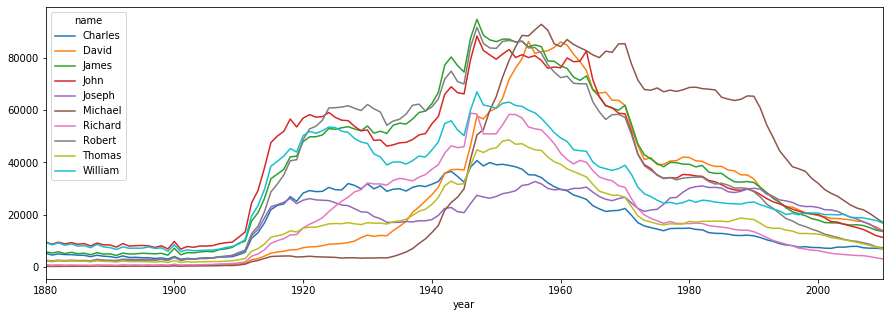

In [85]:
df.plot(rot=0, figsize=(15, 5))


## 敘述性統計

In [86]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/2330.csv')

In [89]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,69.649002,69.649002,68.475197,69.649002,37.690960,2.006623e+11
1,2000-01-05,69.649002,71.214104,68.866302,71.214104,38.537937,4.024668e+11
2,2000-01-06,70.822899,71.214104,69.649002,69.649002,37.690960,1.975457e+11
3,2000-01-07,67.301300,68.475197,66.518600,67.692497,36.632195,2.352703e+11
4,2000-01-10,69.649002,70.431396,68.475197,70.040199,37.902672,2.761717e+11


In [90]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5046,2020-02-21,325.5,326.5,323.0,325.0,325.0,22813534.0
5047,2020-02-24,319.5,321.5,319.5,320.0,320.0,41693680.0
5048,2020-02-25,320.0,323.5,317.5,322.0,322.0,36195011.0
5049,2020-02-26,317.0,320.5,316.5,318.5,318.5,60479362.0
5050,2020-02-27,319.0,320.0,315.0,316.0,316.0,61250927.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5051 entries, 0 to 5050
Data columns (total 7 columns):
Date         5051 non-null object
Open         4964 non-null float64
High         4964 non-null float64
Low          4964 non-null float64
Close        4964 non-null float64
Adj Close    4964 non-null float64
Volume       4964 non-null float64
dtypes: float64(6), object(1)
memory usage: 276.3+ KB


In [92]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4.964000e+03
mean,100.828940,101.691419,99.901904,100.846336,80.748219,2.288389e+10
std,69.618378,69.948784,69.221220,69.622729,72.606518,4.512527e+10
min,26.995701,27.612900,26.918800,27.458401,14.859277,0.000000e+00
25%,52.834400,53.605598,52.063099,52.834400,30.735598,3.085317e+07
50%,67.479897,67.972504,66.844452,67.479897,43.142086,4.834050e+07
75%,133.500000,135.000000,132.500000,133.500000,111.684639,3.842259e+10
max,345.500000,346.000000,344.500000,346.000000,346.000000,4.476381e+11


In [93]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [95]:
df['Close'].min()

27.458401000000002

In [96]:
df['Close'].max()

346.0

In [97]:
len(df['Close'])

5051

In [98]:
df['Close'].count()

4964

In [100]:
df['Close'].head()

0    69.649002
1    71.214104
2    69.649002
3    67.692497
4    70.040199
Name: Close, dtype: float64

In [101]:
df['Close'].tail()

5046    325.0
5047    320.0
5048    322.0
5049    318.5
5050    316.0
Name: Close, dtype: float64

In [107]:
salary = [80,90,100,110,120, 2000]

In [108]:
import pandas
s_series = pandas.Series(salary)

In [109]:
s_series.mean()

416.6666666666667

In [110]:
s_series.sum() / len(s_series)

416.6666666666667

In [111]:
s_series.median()

105.0

In [112]:
salary2 = [80,90,100,100, 110,120, 2000]

In [113]:
import pandas
s_series2 = pandas.Series(salary2)

In [116]:
s_series2.value_counts()

100     2
120     1
110     1
2000    1
90      1
80      1
dtype: int64

In [117]:
df['Close'].mean()

100.84633644601128

In [118]:
df['Close'].median()

67.479897

In [119]:
salary2 = [80,90,100, 100, 110,120,2000]

In [120]:
s_series2 = pandas.Series(salary2)

In [121]:
s_series2.quantile(0.75)

115.0

In [122]:
s_series2.quantile(0.25)

95.0

In [123]:
s_series2.quantile(0.5)

100.0

In [124]:
s_series2.quantile(0.75) - s_series2.quantile(0.25)

20.0

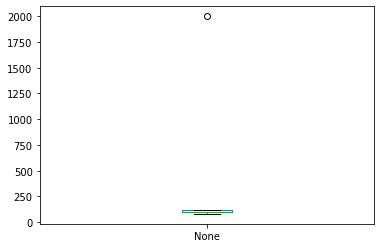

In [126]:
s_series2.plot(kind = 'box')

In [127]:
salary1 = [80,90,100, 100, 110,120,200]
salary2 = [92, 95, 110, 130, 150,135,170]

In [129]:
s1 = pandas.Series(salary1)
s2 = pandas.Series(salary2)

In [135]:
s1.mean()

114.28571428571429

In [136]:
s2.mean()

126.0

In [133]:
s_merge = pandas.concat([s1, s2], axis = 1)

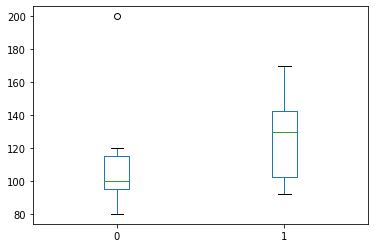

In [134]:
s_merge.plot(kind = 'box')

## 箱形圖
- 揭露統計性質
- 找出離群值
- 比較不同數據之間的高低

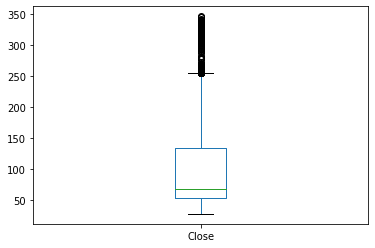

In [138]:
df['Close'].plot(kind = 'box')

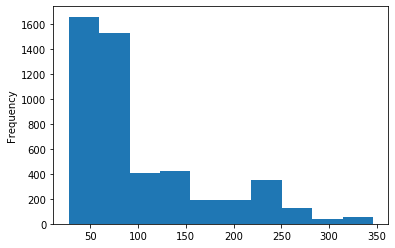

In [140]:
df['Close'].plot(kind = 'hist')

In [142]:
df['Close'].head()

0    69.649002
1    71.214104
2    69.649002
3    67.692497
4    70.040199
Name: Close, dtype: float64

In [143]:
(71.214104 - 69.649002) / 69.649002

0.02247127676000311

In [144]:
df_ret = df['Close'].pct_change(1)

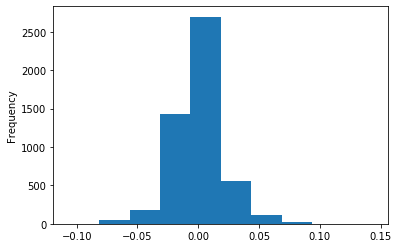

In [146]:
df_ret.plot(kind = 'hist')

## 標準差

In [147]:
df['Close'].std()

69.62272898676441

In [148]:
df['Close'].var()

4847.324391564446

In [149]:
df['Close'].std() ** 2

4847.324391564446

## 讀取股票數據

In [150]:
! pip install pandas_datareader

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [152]:
from pandas_datareader import DataReader
df2 = DataReader(['2330.TW', '2498.TW'], data_source='yahoo')['Close']

In [154]:
df_ret = df2.pct_change(1)

In [157]:
df_ret.mean()

Symbols
2330.TW    0.000743
2498.TW   -0.000467
dtype: float64

In [156]:
df_ret.std()

Symbols
2330.TW    0.014538
2498.TW    0.028568
dtype: float64

## 共變異數

In [158]:
import numpy
X = [100,200,300]
Y = [100,200,300]
nx = numpy.array(X)
ny = numpy.array(Y)

In [161]:
((nx - nx.mean()) * (ny - ny.mean())).sum() / len(nx)

6666.666666666667

In [162]:
import numpy
X = [10000,20000,30000]
Y = [10000,20000,30000]
nx = numpy.array(X)
ny = numpy.array(Y)
((nx - nx.mean()) * (ny - ny.mean())).sum() / len(nx)

66666666.666666664

In [163]:
cov_1 = ((nx - nx.mean()) * (ny - ny.mean())).sum() / len(nx)

In [164]:
cov_1 / (nx.std() * ny.std())

1.0000000000000002

In [175]:
from pandas_datareader import DataReader
stock = DataReader(['2330.TW', '2498.TW', '2454.TW', '2882.TW', '2881.TW', '1101.TW', '1102.TW'], data_source='yahoo')['Close']

In [176]:
stock.cov()

Symbols,1101.TW,1102.TW,2330.TW,2454.TW,2498.TW,2881.TW,2882.TW
Symbols,,,,,,,
1101.TW,26.058523,25.828583,171.715326,95.754421,-408.404410,5.492029,11.351152
1102.TW,25.828583,31.932744,127.469849,131.383488,-297.318803,0.710544,2.124876
2330.TW,171.715326,127.469849,5093.289365,-1960.533136,-13096.789696,162.308990,315.467717
2454.TW,95.754421,131.383488,-1960.533136,8166.051705,3587.422441,52.819493,79.691827
2498.TW,-408.404410,-297.318803,-13096.789696,3587.422441,74073.134622,-306.660426,-1028.867112
2881.TW,5.492029,0.710544,162.308990,52.819493,-306.660426,48.370251,47.068110
2882.TW,11.351152,2.124876,315.467717,79.691827,-1028.867112,47.068110,63.791150


In [177]:
stock.corr()

Symbols,1101.TW,1102.TW,2330.TW,2454.TW,2498.TW,2881.TW,2882.TW
Symbols,,,,,,,
1101.TW,1.000000,0.895380,0.471341,0.207576,-0.293958,0.164731,0.278410
1102.TW,0.895380,1.000000,0.316075,0.257286,-0.193319,0.017675,0.047080
2330.TW,0.471341,0.316075,1.000000,-0.303997,-0.674272,0.364823,0.553446
2454.TW,0.207576,0.257286,-0.303997,1.000000,0.145863,0.088248,0.110415
2498.TW,-0.293958,-0.193319,-0.674272,0.145863,1.000000,-0.579262,-0.473313
2881.TW,0.164731,0.017675,0.364823,0.088248,-0.579262,1.000000,0.896376
2882.TW,0.278410,0.047080,0.553446,0.110415,-0.473313,0.896376,1.000000


## Matplotlib

In [180]:
import numpy as np
x = np.linspace(0,5,11)
y = x ** 2

In [183]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


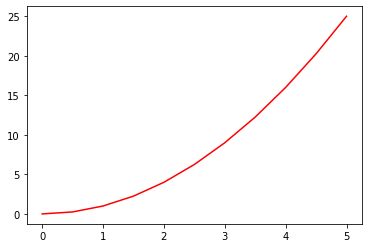

In [184]:
plt.plot(x, y , 'r')

Text(0.5, 1.0, 'title')

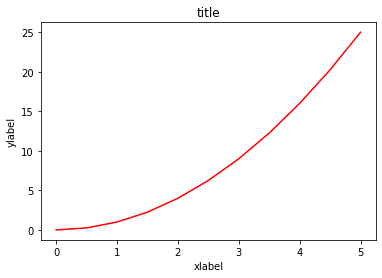

In [186]:
plt.plot(x, y , 'r')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')

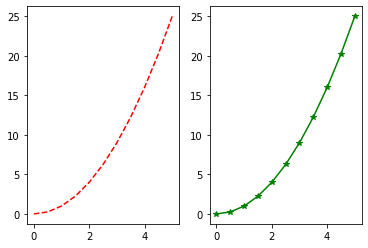

In [189]:
plt.subplot(1, 2, 1 )
plt.plot(x,y, 'r--')
plt.subplot(1, 2, 2 )
plt.plot(x,y, 'g*-')

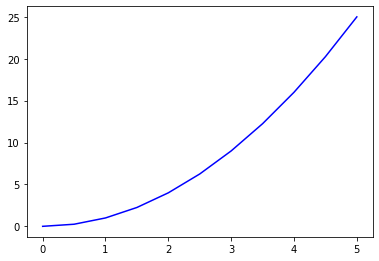

In [198]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(x,y,'b')

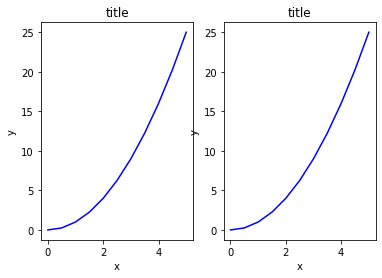

In [200]:
# 於一張圖中建立兩張子圖
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# 呈現物件   
fig;


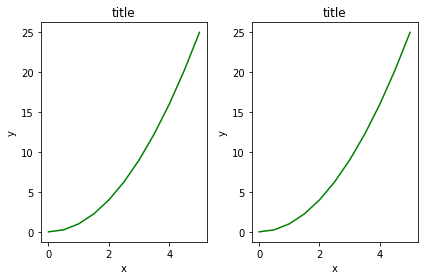

In [201]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout();


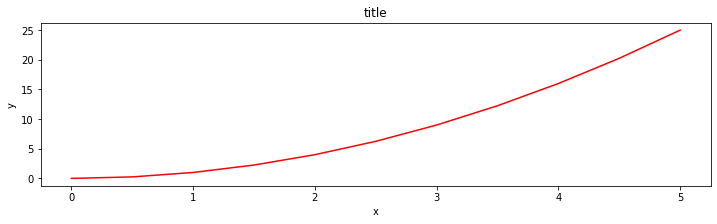

In [202]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');


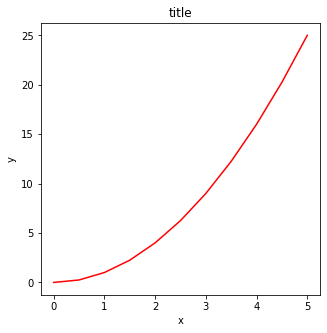

In [203]:
fig, axes = plt.subplots(figsize=(5,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');


In [204]:
fig.savefig("test.png", dpi=200)


In [205]:
?fig.add_axes

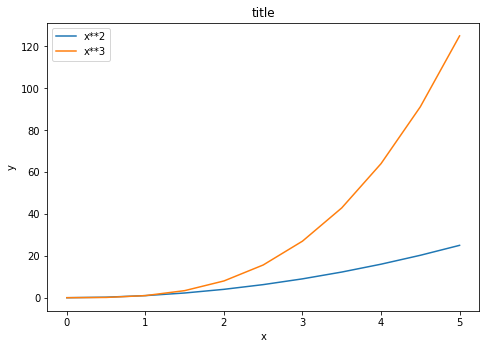

In [206]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_title("title");
ax.set_xlabel("x")
ax.set_ylabel("y");

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()


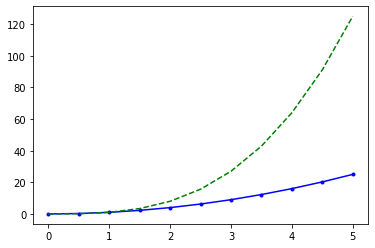

In [207]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line


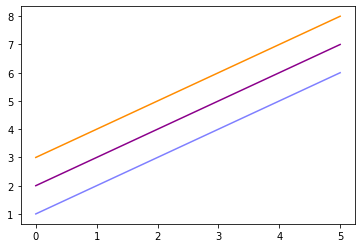

In [208]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 


## 折線圖

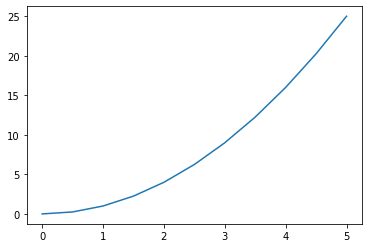

In [210]:
plt.plot(x,y)

## 散佈圖

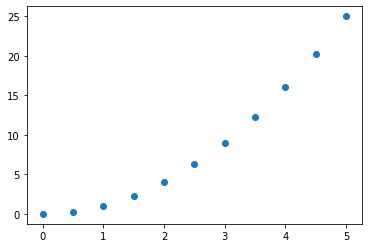

In [211]:
plt.scatter(x,y)

## 直方圖

In [213]:
from random import sample
data = sample(range(1, 1000), 100)
data[0:3]

[902, 591, 17]

(array([ 8., 14., 15., 11.,  9.,  9., 10.,  8.,  9.,  7.]),
 array([ 17. , 114.3, 211.6, 308.9, 406.2, 503.5, 600.8, 698.1, 795.4,
        892.7, 990. ]),
 <a list of 10 Patch objects>)

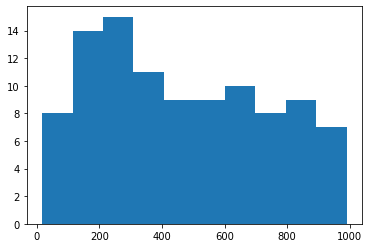

In [214]:
plt.hist(data)

In [217]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

data[0].shape


(100,)

In [218]:
len(data)

3

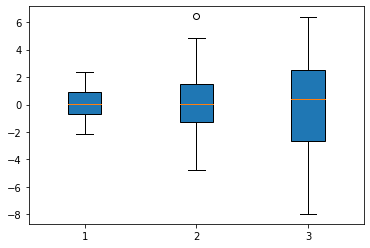

In [219]:
plt.boxplot(data,vert=True,patch_artist=True); 

## 使用Pandas 繪圖

In [220]:
import pandas_datareader
df = pandas_datareader.DataReader('aapl', data_source='yahoo', start='2014-01-01')
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-25,302.529999,286.130005,300.950012,288.079987,57668400.0,288.079987
2020-02-26,297.880005,286.500000,286.529999,292.649994,49513700.0,292.649994
2020-02-27,286.000000,272.959991,281.100006,273.519989,80151400.0,273.519989
2020-02-28,278.410004,256.369995,257.260010,273.359985,106721200.0,273.359985
2020-03-02,301.440002,277.720001,282.279999,298.809998,85160300.0,298.809998


In [221]:
df['Close'].head()

Date
2013-12-31    80.145714
2014-01-02    79.018570
2014-01-03    77.282860
2014-01-06    77.704285
2014-01-07    77.148575
Name: Close, dtype: float64

In [222]:
?df['Close'].plot

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


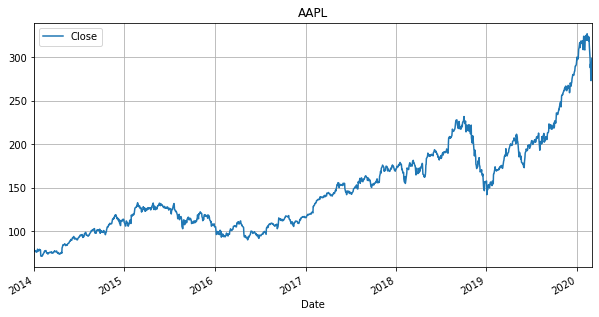

In [223]:
% pylab inline
df['Close'].plot(kind='line', figsize=[10,5], title= "AAPL", legend=True, grid=True)


In [229]:
df['ma30'] = df['Close'].rolling(window=30).mean()
df['ma180'] = df['Close'].rolling(window=180).mean()


In [230]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,ma30,ma180
Date,,,,,,,,
2013-12-31,80.182854,79.142860,79.167145,80.145714,55771100.0,71.950768,NaN,NaN
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,70.938835,NaN,NaN
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,69.380615,NaN,NaN
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,69.758965,NaN,NaN
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,69.260056,NaN,NaN


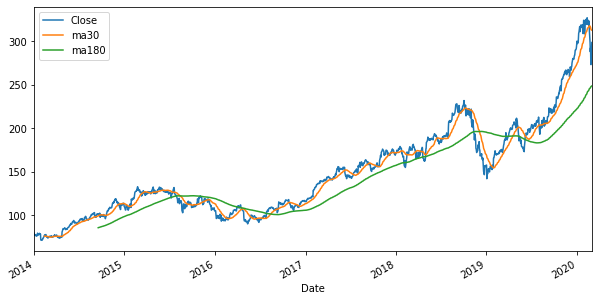

In [231]:
df[['Close','ma30', 'ma180']].plot(kind='line', legend=True, figsize=[10,5])


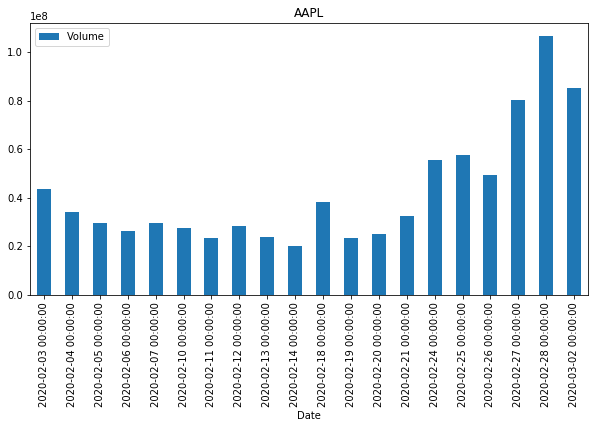

In [232]:
df.loc[df.index >= '2020-02-01' , 'Volume'].plot(kind='bar', figsize=[10,5], title= "AAPL", legend=True)


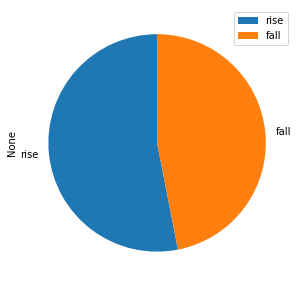

In [235]:
df['diff'] = df['Close'] - df['Open']
df['rise'] = df['diff'] > 0 
df['fall'] = df['diff'] < 0
df[['rise', 'fall']].sum().plot(kind = 'pie', figsize=[5,5], counterclock=True, startangle=90, legend=True)


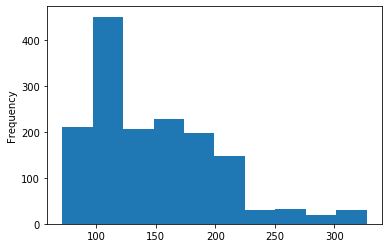

In [236]:
df['Close'].plot(kind='hist')


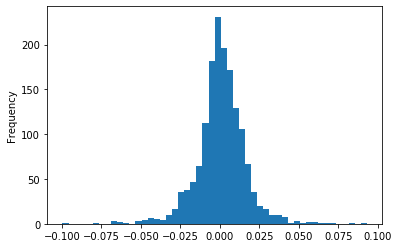

In [237]:
df['ret'] = df['Close'].pct_change(1)
df['ret'].plot(kind='hist', bins = 50)


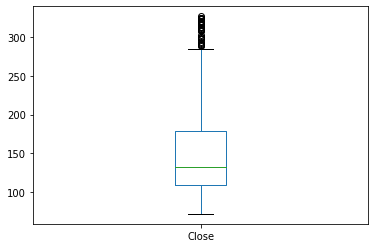

In [238]:
df['Close'].plot(kind='box')
